In [2]:
import pandas as pd

# Load the data
gcb = pd.read_csv('/content/GCB2022v27_MtCO2_flat.csv')
uk = pd.read_csv('/content/uk_renewable_energy.csv')

# Check the dataframes
print(gcb.head())
print(uk.head())

# Merge the dataframes (assuming 'Year' is a common column in both dataframes)
merged_df = pd.merge(gcb, uk, on='Year')

# Check for missing values
print(merged_df.isnull().sum())

# Save the cleaned dataframe to a new CSV
merged_df.to_csv('/content/merged_cleaned_data.csv', index=False)

       Country ISO 3166-1 alpha-3  Year  Total  Coal  Oil  Gas  Cement  \
0  Afghanistan                AFG  1750    0.0   NaN  NaN  NaN     NaN   
1  Afghanistan                AFG  1751    0.0   NaN  NaN  NaN     NaN   
2  Afghanistan                AFG  1752    0.0   NaN  NaN  NaN     NaN   
3  Afghanistan                AFG  1753    0.0   NaN  NaN  NaN     NaN   
4  Afghanistan                AFG  1754    0.0   NaN  NaN  NaN     NaN   

   Flaring  Other  Per Capita  
0      NaN    NaN         NaN  
1      NaN    NaN         NaN  
2      NaN    NaN         NaN  
3      NaN    NaN         NaN  
4      NaN    NaN         NaN  
   Year  Energy from renewable & waste sources  \
0  1990                                  1.647   
1  1991                                  1.634   
2  1992                                  1.843   
3  1993                                  1.862   
4  1994                                  2.528   

   Total energy consumption of primary fuels and equivalents  

In [3]:
# Filter the first dataframe for only UK data
gcb_uk = gcb[gcb['Country'] == 'United Kingdom']

# Merge the dataframes
merged_df = pd.merge(gcb_uk, uk, on='Year')

# Check for missing values
print(merged_df.isnull().sum())

#fill missing values with 0 (or any other value or method)
merged_df_filled = merged_df.fillna(0)

# Save the cleaned dataframe to a new CSV
merged_df_filled.to_csv('/content/merged_cleaned_data.csv', index=False)

Country                                                      0
ISO 3166-1 alpha-3                                           0
Year                                                         0
Total                                                        0
Coal                                                         0
Oil                                                          0
Gas                                                          0
Cement                                                       0
Flaring                                                      0
Other                                                        0
Per Capita                                                   0
Energy from renewable & waste sources                        0
Total energy consumption of primary fuels and equivalents    0
Fraction from renewable sources and waste                    0
Hydroelectric power                                          0
Wind, wave, tidal                                      

           Country ISO 3166-1 alpha-3  Year       Total        Coal  \
0   United Kingdom                GBR  1990  601.945078  252.689667   
1   United Kingdom                GBR  1991  609.412673  253.622509   
2   United Kingdom                GBR  1992  593.845922  237.746940   
3   United Kingdom                GBR  1993  579.612537  207.685853   
4   United Kingdom                GBR  1994  574.016890  195.375628   
5   United Kingdom                GBR  1995  566.158959  181.699266   
6   United Kingdom                GBR  1996  586.760676  173.071522   
7   United Kingdom                GBR  1997  562.708106  154.728657   
8   United Kingdom                GBR  1998  568.543698  154.087839   
9   United Kingdom                GBR  1999  561.649574  138.313400   
10  United Kingdom                GBR  2000  569.033716  144.443080   
11  United Kingdom                GBR  2001  577.970573  153.533658   
12  United Kingdom                GBR  2002  560.273200  141.691083   
13  Un

<ipython-input-7-ec0545920d6a>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


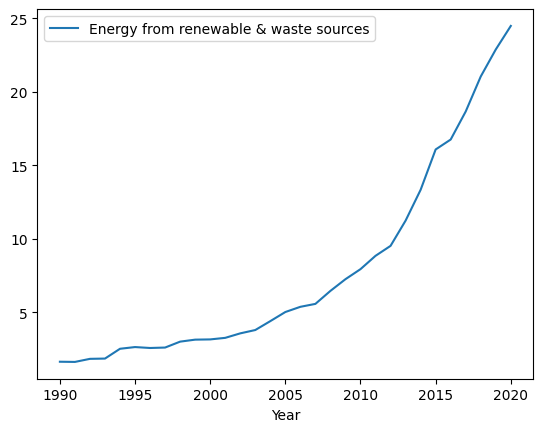

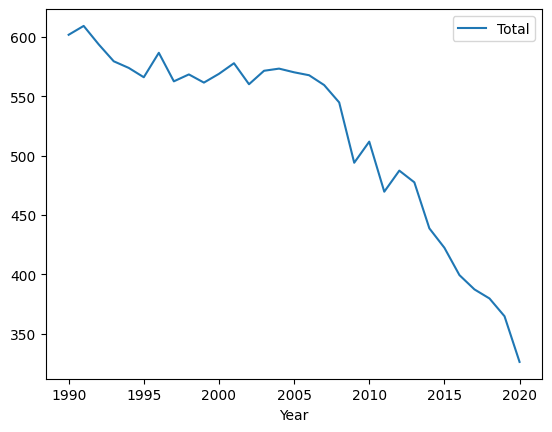

In [7]:
import pandas as pd

# Read the data from the CSV file
df = pd.read_csv('/content/merged_cleaned_data.csv')

# Show the first few rows of the data
print(df)

# Calculate correlations
correlations = df.corr()

# Print correlations with Total CO2 Emissions
print(correlations['Total'])

# Plotting
import matplotlib.pyplot as plt
df.plot(x='Year', y='Energy from renewable & waste sources')
df.plot(x='Year', y='Total')
plt.show()

<ipython-input-5-10d77a47a31e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


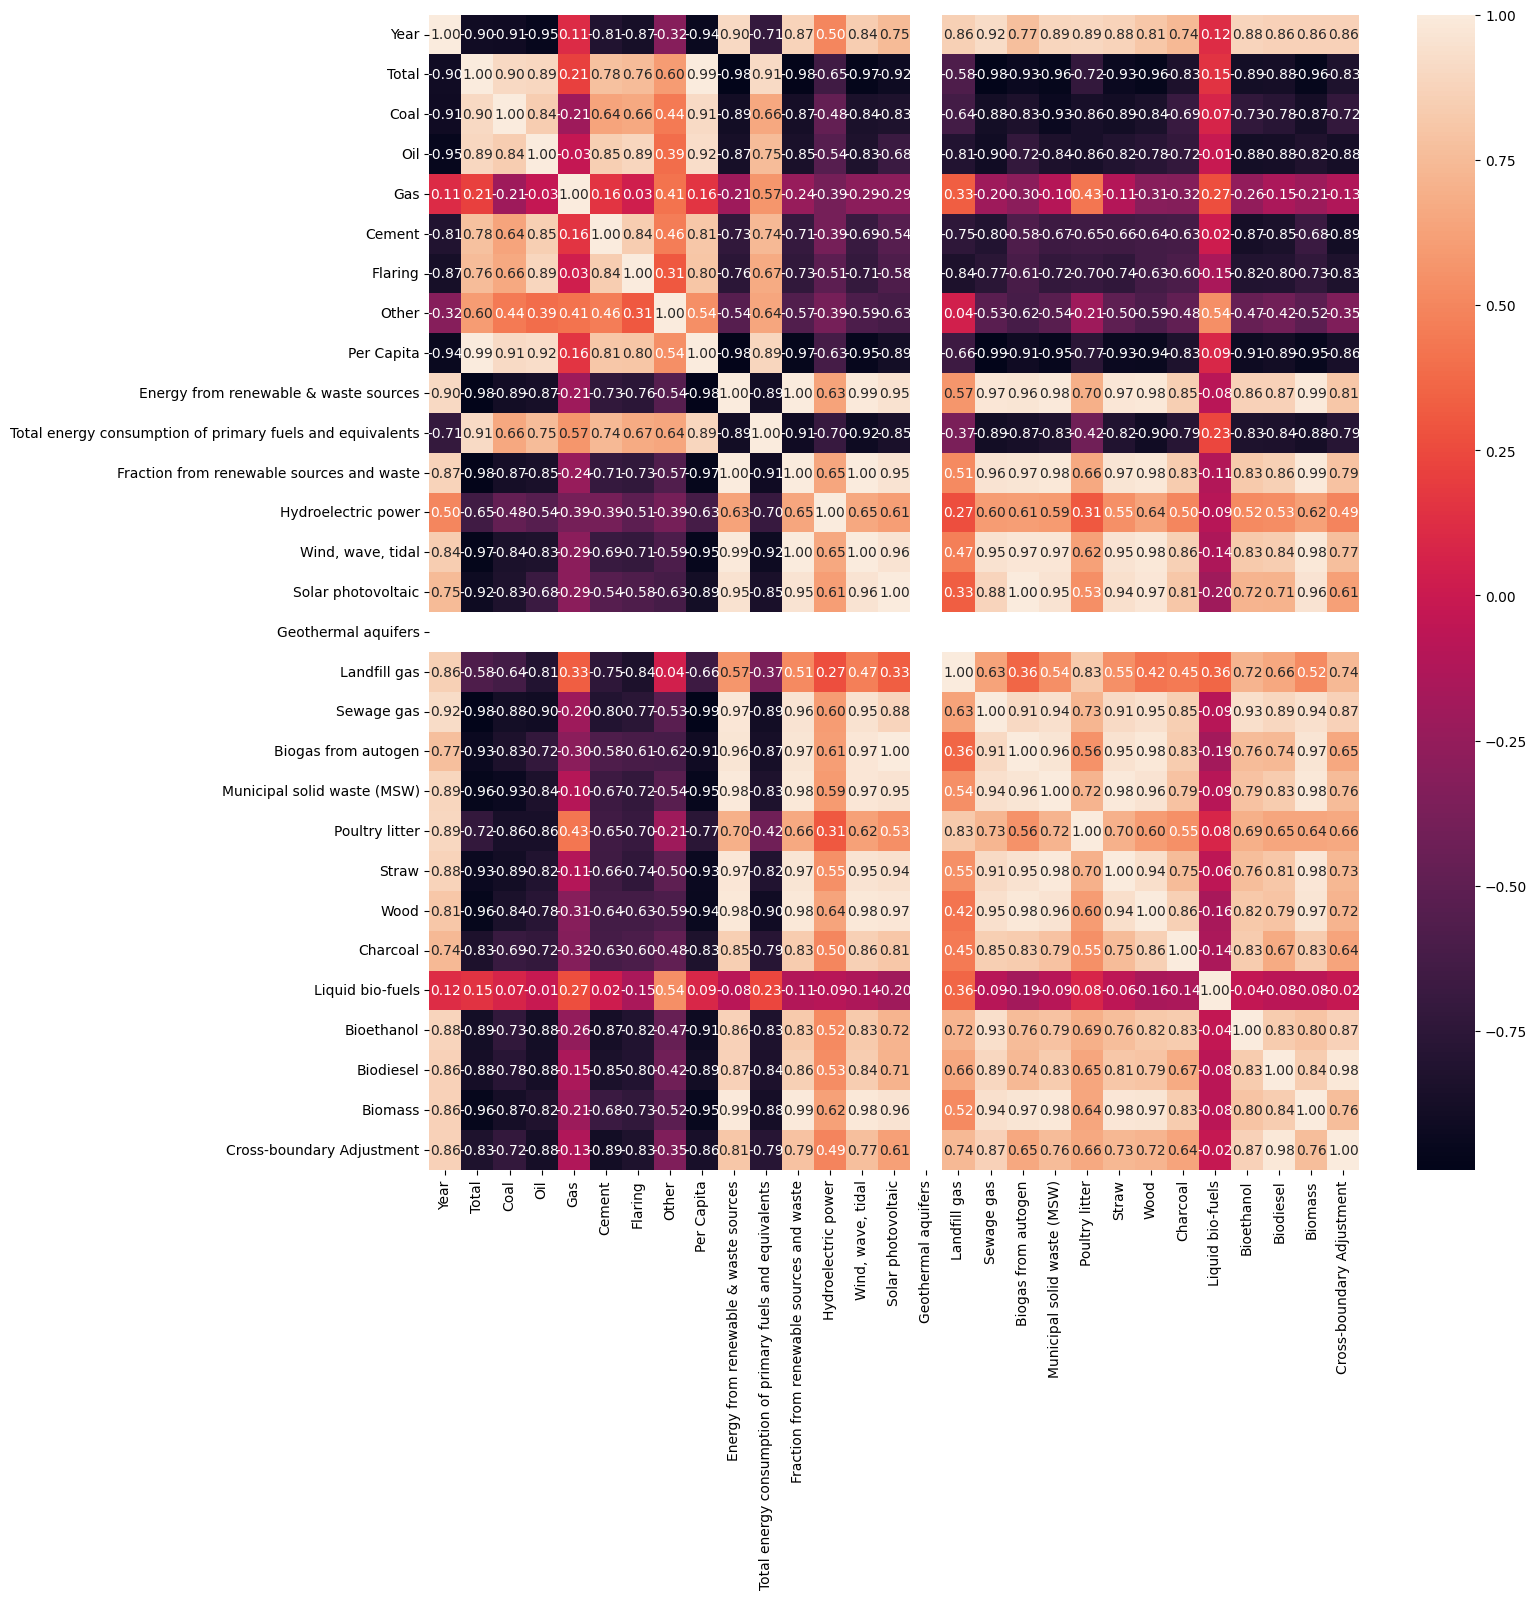

In [5]:
import seaborn as sns

# Calculate correlations
correlations = df.corr()

# Plot heatmap of correlations
plt.figure(figsize=(15,15))
sns.heatmap(correlations, annot=True, fmt=".2f")
plt.show()

Model 1 - MSE: 14.961531562949702 MAE: 2.657506968571543 R2 Score: 0.9978387708051486
Model 2 - MSE: 49.785838927153364 MAE: 4.863924857142861 R2 Score: 0.9928083159049046
MSE Improvement: -34.82430736420366


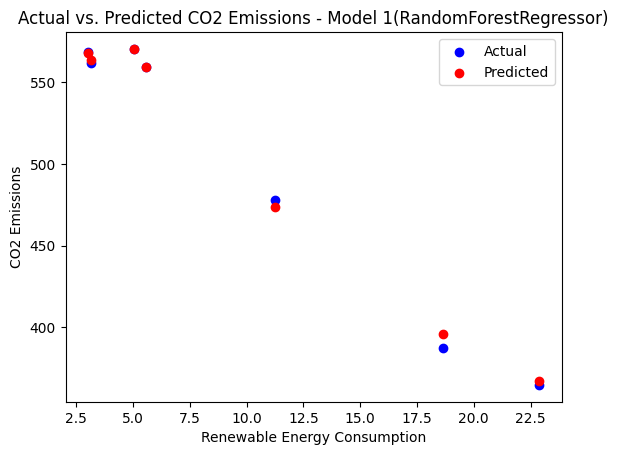

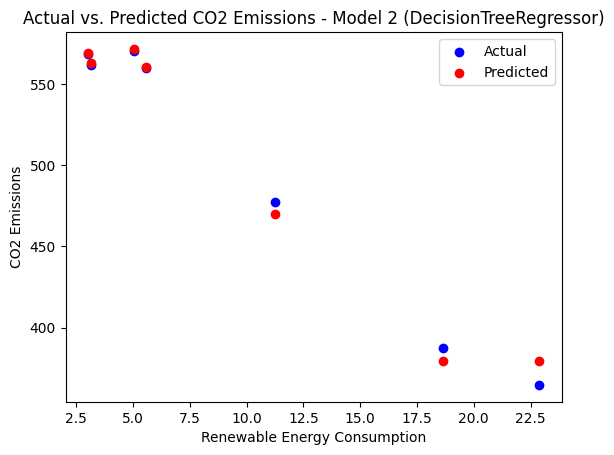

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Import additional metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE

# Data Preprocessing
merged_data = pd.read_csv('/content/merged_cleaned_data.csv')
features = merged_data[['Energy from renewable & waste sources', 'Total', 'Year']]
target = merged_data['Total']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a random forest regressor using the full dataset
model_1 = RandomForestRegressor(random_state=42)
model_1.fit(X_train, y_train)

# Evaluate the model on the testing set
predictions_1 = model_1.predict(X_test)
mse_1 = mean_squared_error(y_test, predictions_1)
mae_1 = mean_absolute_error(y_test, predictions_1)  # Calculate MAE
r2_1 = r2_score(y_test, predictions_1)  # Calculate R-squared
print('Model 1 - MSE:', mse_1, 'MAE:', mae_1, 'R2 Score:', r2_1)

# Feature Selection
rfe = RFE(estimator=RandomForestRegressor(random_state=42), n_features_to_select=5)
rfe.fit(features, target)
selected_features = features.columns[rfe.support_]

# Split the data into training and testing sets for selected features
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

# Train a DecisionTreeRegressor using the subset of relevant features
model_2 = DecisionTreeRegressor(random_state=42)
model_2.fit(X_train_sel, y_train)

# Evaluate the model on the testing set
predictions_2 = model_2.predict(X_test_sel)
mse_2 = mean_squared_error(y_test, predictions_2)
mae_2 = mean_absolute_error(y_test, predictions_2)  # Calculate MAE
r2_2 = r2_score(y_test, predictions_2)  # Calculate R-squared
print('Model 2 - MSE:', mse_2, 'MAE:', mae_2, 'R2 Score:', r2_2)

# Evaluation and Analysis
print('MSE Improvement:', mse_1 - mse_2)

# Visualize the Results
plt.scatter(X_test['Energy from renewable & waste sources'], y_test, color='b', label='Actual')
plt.scatter(X_test['Energy from renewable & waste sources'], predictions_1, color='r', label='Predicted')
plt.xlabel('Renewable Energy Consumption')
plt.ylabel('CO2 Emissions')
plt.title('Actual vs. Predicted CO2 Emissions - Model 1(RandomForestRegressor)')
plt.legend()
plt.show()

plt.scatter(X_test_sel['Energy from renewable & waste sources'], y_test, color='b', label='Actual')
plt.scatter(X_test_sel['Energy from renewable & waste sources'], predictions_2, color='r', label='Predicted')
plt.xlabel('Renewable Energy Consumption')
plt.ylabel('CO2 Emissions')
plt.title('Actual vs. Predicted CO2 Emissions - Model 2 (DecisionTreeRegressor)')
plt.legend()
plt.show()